In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

### 1. Read csv and explore dataset

The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues

In [2]:
df = pd.read_csv('80111.csv')

In [5]:
df.head()

id      price  sqft_living  bedrooms  bathrooms  year_built  zipcode  \
0   1  1249000.0       6209.0         5        5.0        1986    80111   
1   2   220000.0       1422.0         5        4.0        1986    80111   
2   3  1250000.0       5614.0         2        3.0        1981    80111   
3   4   599900.0       2785.0         4        3.0        1982    80111   
4   5   986950.0       3449.0         6        4.0        2019    80111   

                       address   Latitude   Longitude  
0         Centennial, CO 80111  39.616672 -104.874651  
1         Centennial, CO 80111  39.616672 -104.874651  
2  Greenwood Village, CO 80111  39.616672 -104.874651  
3          Englewood, CO 80111  39.616672 -104.874651  
4         Centennial, CO 80111  39.616672 -104.874651

### 2. Analyzing null values and types

In [3]:
tb_info = pd.DataFrame(df.dtypes).T.rename(index={0: 'types'})
tb_info = tb_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'is null'}))
tb_info = tb_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0: 'is null'}))
tb_info

id    price sqft_living bedrooms bathrooms year_built zipcode  \
types    int64  float64     float64    int64   float64      int64   int64   
is null      0        0           0        0         0          0       0   
is null      0        0           0        0         0          0       0   

        address Latitude Longitude  
types    object  float64   float64  
is null       0        0         0  
is null       0        0         0

In [4]:
df.year_built.describe()

count      66.000000
mean     1994.090909
std        18.709707
min      1960.000000
25%      1979.250000
50%      1990.000000
75%      2018.000000
max      2019.000000
Name: year_built, dtype: float64

### 3. Creating chart with total prices of house between 1960 and 2019

In [5]:
year_groupby = df.groupby(['year_built']).price.sum().reset_index()
sort_year_groupby = year_groupby.sort_values(by='price', ascending=False)
sort_year_groupby

fig = px.bar(sort_year_groupby, x='year_built', y='price',
             hover_data=['year_built', 'price'], color='price',
             height=400)

fig.update_layout(title_text='Price of houses between 1960 - 2019')
fig.show()

### 4. Creating chart with mean prices of house between 1960 and 2019

In [7]:
year_groupby = df.groupby(['year_built']).price.mean().reset_index()
sort_year_groupby = year_groupby.sort_values(by='price', ascending=False)
sort_year_groupby

fig = px.bar(sort_year_groupby, x='year_built', y='price',
             hover_data=['year_built', 'price'], color='price',
             height=400)

fig.update_layout(title_text='Price of houses between 1960 - 2019 (Average)')
fig.show()

### 5. Starts with simple regression linear 

In [8]:
df.head()

id      price  sqft_living  bedrooms  bathrooms  year_built  zipcode  \
0   1  1249000.0       6209.0         5        5.0        1986    80111   
1   2   220000.0       1422.0         5        4.0        1986    80111   
2   3  1250000.0       5614.0         2        3.0        1981    80111   
3   4   599900.0       2785.0         4        3.0        1982    80111   
4   5   986950.0       3449.0         6        4.0        2019    80111   

                       address   Latitude   Longitude  
0         Centennial, CO 80111  39.616672 -104.874651  
1         Centennial, CO 80111  39.616672 -104.874651  
2  Greenwood Village, CO 80111  39.616672 -104.874651  
3          Englewood, CO 80111  39.616672 -104.874651  
4         Centennial, CO 80111  39.616672 -104.874651

### 6. For X variable, i getting 'year_built' column, for y variable, i getting column 'price', because i want predict what price for the next years

In [9]:
X = df['year_built'].values
y = df['price'].values

In [10]:
df.shape

(66, 10)

### 7. I realizing reshape for variable X and Y.

In [11]:
X = X.reshape((len(df), 1))
y = y.reshape((len(df), 1))

### 8. Creating and splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

### 9. Creating linear regression object

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 10. Creating scatter chart with predicting results of train variables

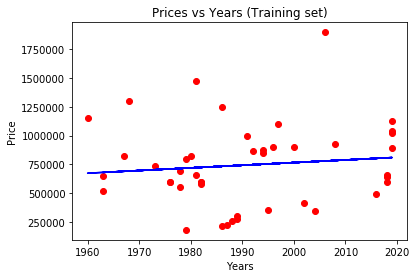

In [14]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Prices vs Years (Training set)')
plt.xlabel('Years')
plt.ylabel('Price')
plt.show()

### 11. Creating scatter chart with predicting results for test variables

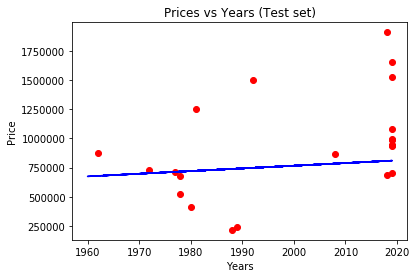

In [16]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Prices vs Years (Test set)')
plt.xlabel('Years')
plt.ylabel('Price')
plt.show()

### Multiple Regression Linear

In [17]:
df.head()

id      price  sqft_living  bedrooms  bathrooms  year_built  zipcode  \
0   1  1249000.0       6209.0         5        5.0        1986    80111   
1   2   220000.0       1422.0         5        4.0        1986    80111   
2   3  1250000.0       5614.0         2        3.0        1981    80111   
3   4   599900.0       2785.0         4        3.0        1982    80111   
4   5   986950.0       3449.0         6        4.0        2019    80111   

                       address   Latitude   Longitude  
0         Centennial, CO 80111  39.616672 -104.874651  
1         Centennial, CO 80111  39.616672 -104.874651  
2  Greenwood Village, CO 80111  39.616672 -104.874651  
3          Englewood, CO 80111  39.616672 -104.874651  
4         Centennial, CO 80111  39.616672 -104.874651

In [19]:
multiple_df = df

### 1. Verify the all addresses of dataset

In [20]:
multiple_df['address'].unique()

array(['Centennial, CO 80111', 'Greenwood Village, CO 80111',
       'Englewood, CO 80111', 'Cherry Hills Village, CO 80111'],
      dtype=object)

### 2. For X variable, i getting columns without 'price' and y variable getting 'price' column, because i want predict what price

In [21]:
X_multiple = multiple_df.drop(['price'], axis=1).values
y_multiple = multiple_df['price'].values

### 3. I realizing reshape for variable X_multiple and Y_multiple

In [23]:
multiple_df.shape

(66, 10)

In [26]:
X_multiple = X_multiple.reshape((len(multiple_df), 9))
y_multiple = y_multiple.reshape((len(multiple_df), 1))

### 4. Realizing fit_transform for our X_multiple variable

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

In [28]:
X_multiple[:, 6] = labelencoder.fit_transform(X_multiple[:, 6])

### 5. Realizing 'One Hot Enconder' in X_multiple variable

In [29]:
onehotencoder = OneHotEncoder(categorical_features = [6])
X_multiple = onehotencoder.fit_transform(X_multiple).toarray()

/home/dev/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.

/home/dev/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning:

The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.



### 6. Creating and splitting the dataset into the Training set and Test set

In [30]:
from sklearn.model_selection import train_test_split
X_multiple_train, X_multiple_test, y_multiple_train, y_multiple_test = train_test_split(X_multiple, y_multiple, test_size = 0.2, random_state = 0)

### 7. Applying fit method in X_multiple and y_multiple

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_multiple_train, y_multiple_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 8. Realizing Predict X_multiple_test 

In [32]:
y_multiple_pred = regressor.predict(X_multiple_test)
y_multiple_pred

array([[7416752.45373483],
       [ 853593.11486981],
       [ 743980.72155841],
       [ 221646.82273396],
       [ 859529.36282012],
       [ 672945.55873564],
       [ 836054.27924246],
       [ 430822.46020928],
       [ 901974.05597865],
       [ 812755.67915297],
       [ 784464.67216099],
       [ 518431.75730739],
       [1266661.31168773],
       [1520850.93987863]])